# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


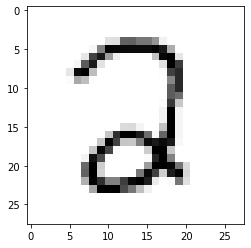

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.238
Training Accuracy: 0.6783, Testing Accuracy: 0.6830



Epoch 10, Loss 0.1239
Training Accuracy: 0.8902, Testing Accuracy: 0.8957



Epoch 20, Loss 0.0707
Training Accuracy: 0.9233, Testing Accuracy: 0.9365



Epoch 30, Loss 0.0521
Training Accuracy: 0.9415, Testing Accuracy: 0.9526



Epoch 40, Loss 0.0436
Training Accuracy: 0.9509, Testing Accuracy: 0.9592



Epoch 50, Loss 0.0388
Training Accuracy: 0.9554, Testing Accuracy: 0.9627



Epoch 60, Loss 0.0357
Training Accuracy: 0.9582, Testing Accuracy: 0.9627



Epoch 70, Loss 0.0334
Training Accuracy: 0.9604, Testing Accuracy: 0.9632



Epoch 80, Loss 0.0317
Training Accuracy: 0.9619, Testing Accuracy: 0.9637



Epoch 90, Loss 0.0303
Training Accuracy: 0.9637, Testing Accuracy: 0.9642



Epoch 100, Loss 0.0291
Training Accuracy: 0.9651, Testing Accuracy: 0.9662



Epoch 110, Loss 0.0281
Training Accuracy: 0.9664, Testing Accuracy: 0.9657



Epoch 120, Loss 0.0272
Training Accuracy: 0.9673, Testing Accuracy: 0.9672



Epoch 130, Loss 0.0264
Training Accuracy: 0.9680, Testing Accuracy: 0.9672



Epoch 140, Loss 0.0257
Training Accuracy: 0.9694, Testing Accuracy: 0.9677



Epoch 150, Loss 0.025
Training Accuracy: 0.9703, Testing Accuracy: 0.9682



Epoch 160, Loss 0.0244
Training Accuracy: 0.9711, Testing Accuracy: 0.9703



Epoch 170, Loss 0.0239
Training Accuracy: 0.9720, Testing Accuracy: 0.9708



Epoch 180, Loss 0.0233
Training Accuracy: 0.9726, Testing Accuracy: 0.9703



Epoch 190, Loss 0.0229
Training Accuracy: 0.9734, Testing Accuracy: 0.9708



Epoch 200, Loss 0.0224
Training Accuracy: 0.9742, Testing Accuracy: 0.9708



Epoch 210, Loss 0.022
Training Accuracy: 0.9749, Testing Accuracy: 0.9708



Epoch 220, Loss 0.0216
Training Accuracy: 0.9760, Testing Accuracy: 0.9718



Epoch 230, Loss 0.0212
Training Accuracy: 0.9767, Testing Accuracy: 0.9718



Epoch 240, Loss 0.0208
Training Accuracy: 0.9772, Testing Accuracy: 0.9723



0.016362418735210056

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.26
Training Accuracy: 0.6251, Testing Accuracy: 0.6331



Epoch 10, Loss 0.1045
Training Accuracy: 0.9071, Testing Accuracy: 0.9199



Epoch 20, Loss 0.0793
Training Accuracy: 0.9291, Testing Accuracy: 0.9355



Epoch 30, Loss 0.068
Training Accuracy: 0.9382, Testing Accuracy: 0.9435



Epoch 40, Loss 0.0612
Training Accuracy: 0.9430, Testing Accuracy: 0.9481



Epoch 50, Loss 0.0567
Training Accuracy: 0.9463, Testing Accuracy: 0.9521



Epoch 60, Loss 0.0534
Training Accuracy: 0.9478, Testing Accuracy: 0.9546



Epoch 70, Loss 0.0509
Training Accuracy: 0.9497, Testing Accuracy: 0.9567



Epoch 80, Loss 0.0488
Training Accuracy: 0.9509, Testing Accuracy: 0.9587



Epoch 90, Loss 0.0472
Training Accuracy: 0.9527, Testing Accuracy: 0.9617



Epoch 100, Loss 0.0458
Training Accuracy: 0.9537, Testing Accuracy: 0.9622



Epoch 110, Loss 0.0446
Training Accuracy: 0.9543, Testing Accuracy: 0.9632



Epoch 120, Loss 0.0435
Training Accuracy: 0.9553, Testing Accuracy: 0.9637



Epoch 130, Loss 0.0426
Training Accuracy: 0.9557, Testing Accuracy: 0.9647



Epoch 140, Loss 0.0418
Training Accuracy: 0.9562, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0411
Training Accuracy: 0.9567, Testing Accuracy: 0.9662



Epoch 160, Loss 0.0404
Training Accuracy: 0.9574, Testing Accuracy: 0.9662



Epoch 170, Loss 0.0398
Training Accuracy: 0.9578, Testing Accuracy: 0.9662



Epoch 180, Loss 0.0393
Training Accuracy: 0.9584, Testing Accuracy: 0.9662



Epoch 190, Loss 0.0387
Training Accuracy: 0.9584, Testing Accuracy: 0.9662



Epoch 200, Loss 0.0383
Training Accuracy: 0.9589, Testing Accuracy: 0.9672



Epoch 210, Loss 0.0378
Training Accuracy: 0.9591, Testing Accuracy: 0.9672



Epoch 220, Loss 0.0374
Training Accuracy: 0.9597, Testing Accuracy: 0.9672



Epoch 230, Loss 0.0371
Training Accuracy: 0.9601, Testing Accuracy: 0.9672



Epoch 240, Loss 0.0367
Training Accuracy: 0.9604, Testing Accuracy: 0.9672



0.0419850771215172

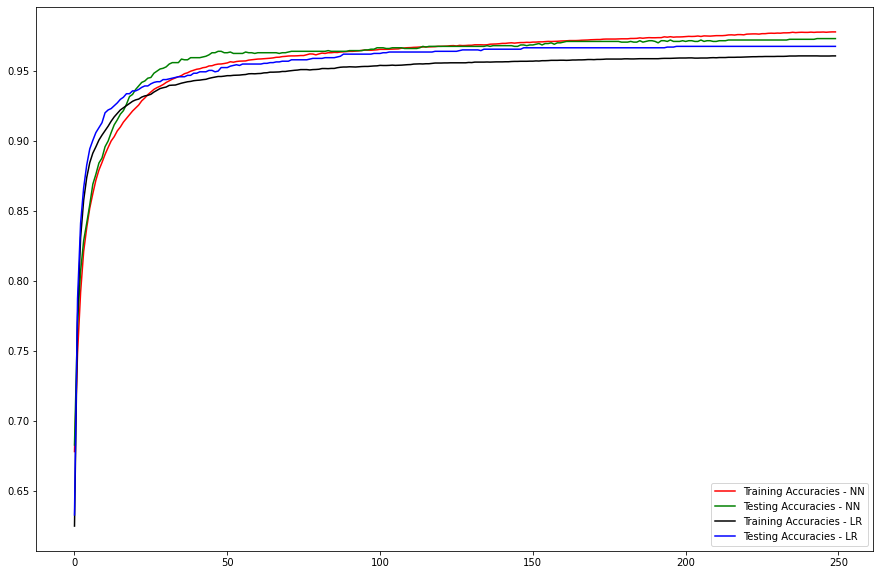

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

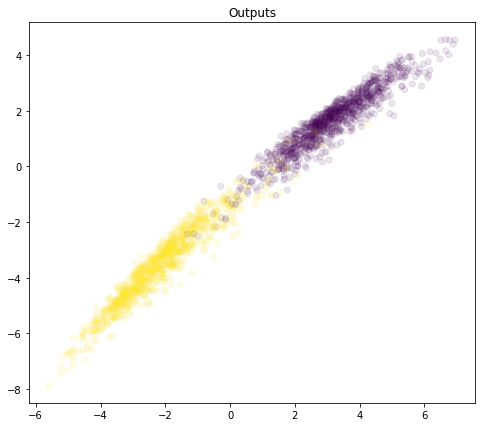

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

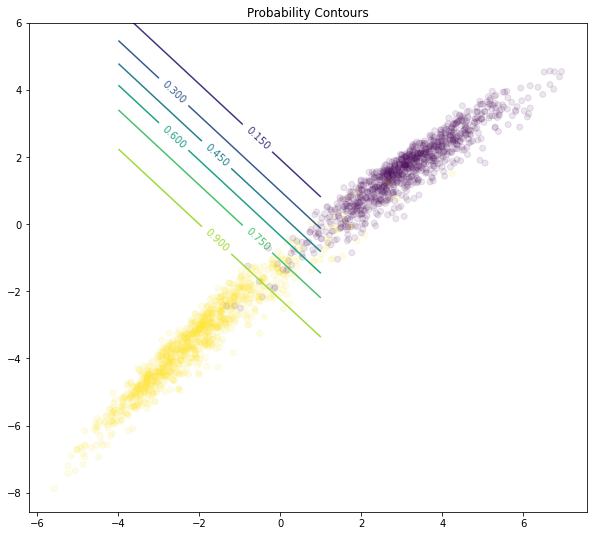

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );